IEEE Citation: K. Alam and K. A. Mamun, "From Cries to Answers: A Comprehensive CNN+DNN Hybrid Model for Infant Cry Classification with Enhanced Data Augmentation and Feature Extraction," 2024 International Conference on Advances in Computing, Communication, Electrical, and Smart Systems (iCACCESS), Dhaka, Bangladesh, 2024, pp. 1-6, doi: 10.1109/iCACCESS61735.2024.10499449.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import subprocess

def convert_file(file_path):


  # Get the file extension.
  extension = os.path.splitext(file_path)[1]

  # Check if the file is an audio file.
  if extension in [".mp3", ".amr", ".m4a", ".mpa", ".aac",".ogg", ".3gpp"]:
    # Convert the file to WAV format.
    subprocess.call([
        "ffmpeg", "-i", file_path, "-c:a", "pcm_s16le", "-ar", "44100", "-ac", "2", "-b:a", "192k", os.path.join(os.path.dirname(file_path), os.path.basename(file_path) + ".wav")
    ])

def convert_folder(folder_path):


  # Get all files in the folder.
  files = os.listdir(folder_path)

  # Convert each file to WAV format.
  for file in files:
    convert_file(os.path.join(folder_path, file))

if __name__ == "__main__":
  # Get the folder path from the user.
  folder_path = "/home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw"

  # Convert all files in the folder to WAV format.
  convert_folder(folder_path)


In [2]:
import librosa
import os
import pandas as pd

data_dir = '/home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw'
accent_folders = os.listdir(data_dir)
print(os.listdir(data_dir))




['discomfort', 'burping', 'belly_pain', 'hungry', 'tired']


In [3]:
data = []

for accent_folder in accent_folders:
    accent_path = os.path.join(data_dir, accent_folder)

    for file in os.listdir(accent_path):
        if file.endswith('.wav'):
            file_path = os.path.join(accent_path, file)
            audio, sr = librosa.load(file_path, sr=None)
            data.append((file_path, accent_folder))

df = pd.DataFrame(data, columns=['Path', 'Class'])

In [4]:
df.head(5)

,Path,Class
0,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
1,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
2,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
3,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
4,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort


In [6]:
# changing integers to actual region.
df['Class'] = df['Class'].replace({1:'belly_pain', 2:'burping', 3:'discomfort', 4:'hungry', 5:'tired'})

df.head()

,Path,Class
0,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
1,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
2,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
3,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort
4,/home/bokuto/Documents/baby-cry-analysis/data/...,discomfort


In [7]:
df.Class

0      discomfort
1      discomfort
2      discomfort
3      discomfort
4      discomfort
          ...    
245         tired
246         tired
247         tired
248         tired
249         tired
Name: Class, Length: 250, dtype: object

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-10-17 18:51:47.171814: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 18:51:47.172432: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 18:51:47.174637: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 18:51:47.181168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 18:51:47.192188: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [9]:
audio_data= df.Path
labels = df.Class

In [10]:

audio_data = np.array(audio_data)
labels = np.array(labels)

In [ ]:
!pip install imbalanced-learn


In [11]:
import librosa
import numpy as np
from imblearn.over_sampling import SMOTE



In [12]:
audio_data.shape

(250,)

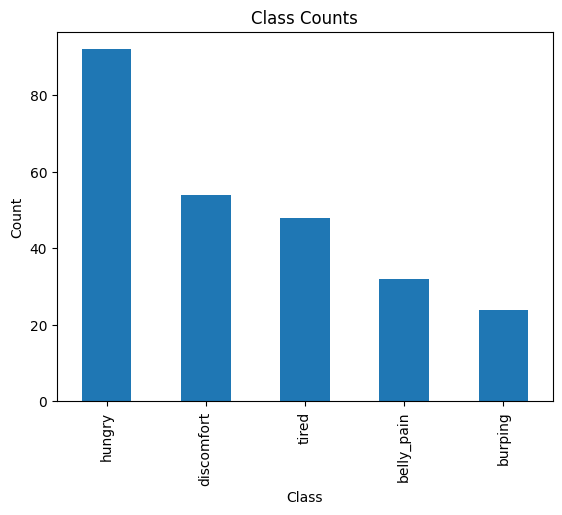

In [13]:
import matplotlib.pyplot as plt
plt.title('Count of Class Data', size=16)
class_counts = df['Class'].value_counts()

# Plot the class counts using a bar plot
class_counts.plot(kind='bar')
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [14]:
import matplotlib.pyplot as plt

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} Class'.format(e), size=15)
    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} Class'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

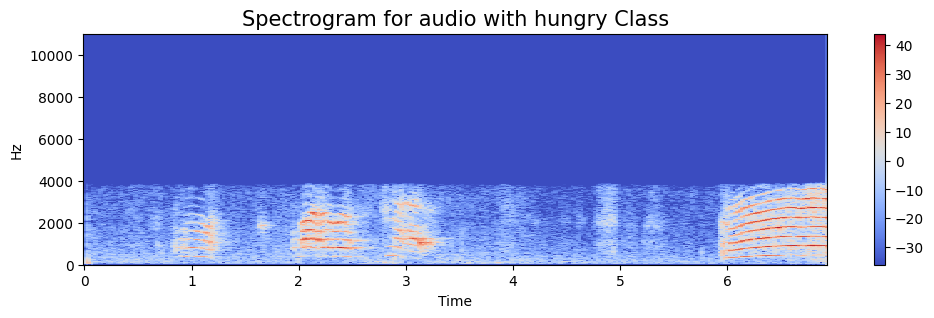

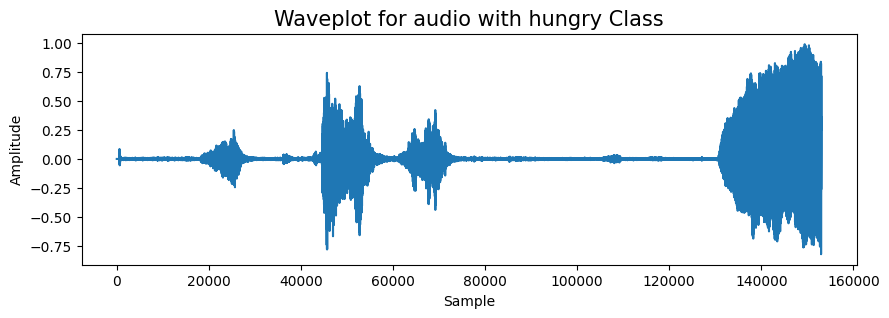

In [15]:
import librosa
from IPython.display import Audio
classes='hungry'
path = np.array(df.Path[df.Class==classes])[0]
data, sampling_rate = librosa.load(path)
create_spectrogram(data, sampling_rate, classes)
create_waveplot(data, sampling_rate, classes)
Audio(path)

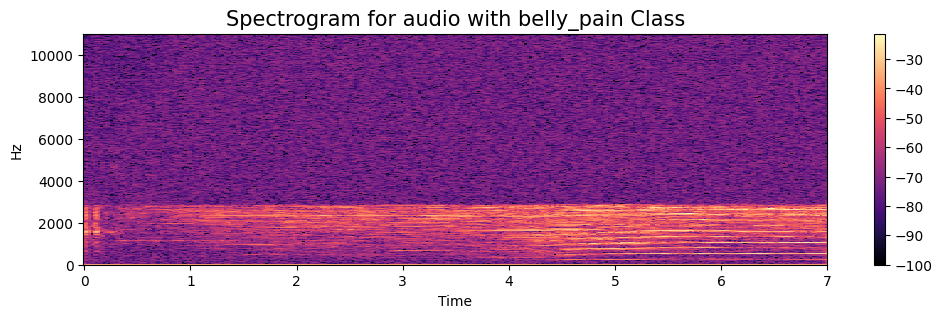

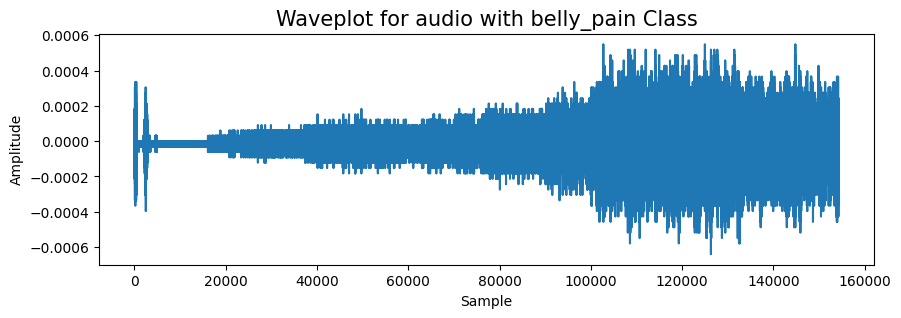

In [16]:
import librosa
from IPython.display import Audio
classes='belly_pain'
path = np.array(df.Path[df.Class==classes])[0]
data, sampling_rate = librosa.load(path)
create_spectrogram(data, sampling_rate, classes)
create_waveplot(data, sampling_rate, classes)
Audio(path)




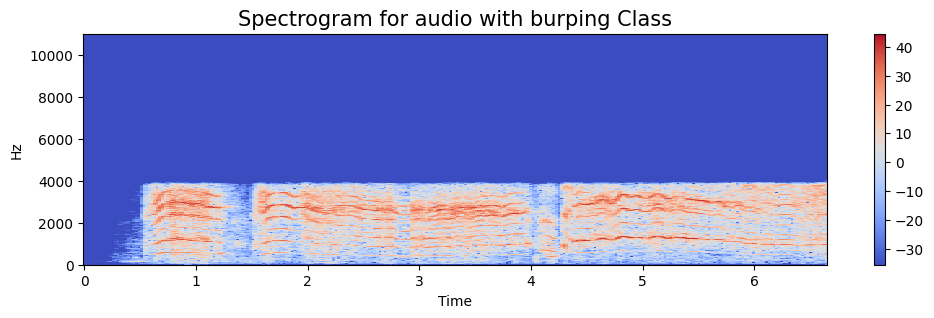

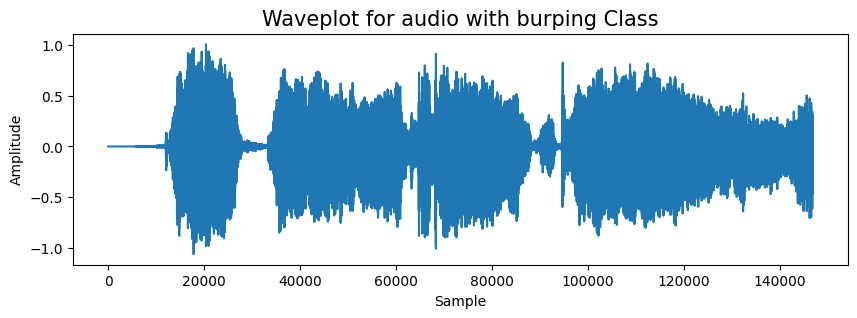

In [17]:
import librosa
from IPython.display import Audio
classes='burping'
path = np.array(df.Path[df.Class==classes])[0]
data, sampling_rate = librosa.load(path)
create_spectrogram(data, sampling_rate, classes)
create_waveplot(data, sampling_rate, classes)
Audio(path)

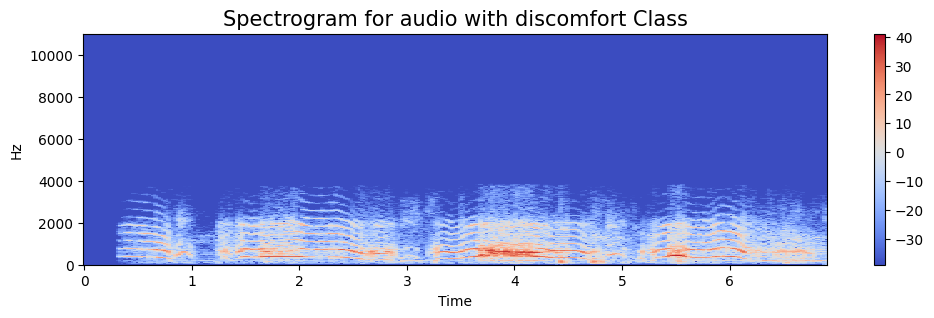

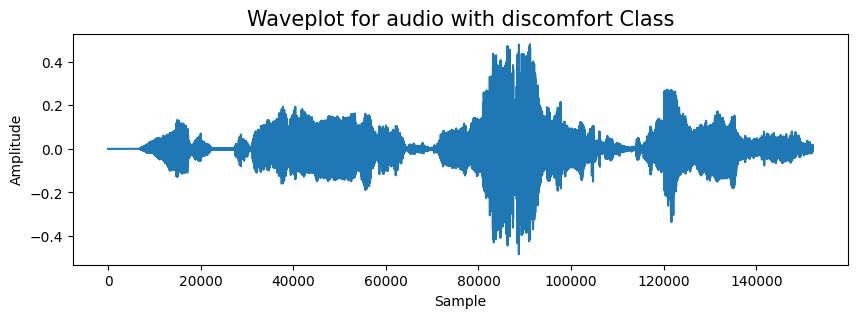

In [18]:
import librosa
from IPython.display import Audio
classes='discomfort'
path = np.array(df.Path[df.Class==classes])[0]
data, sampling_rate = librosa.load(path)
create_spectrogram(data, sampling_rate, classes)
create_waveplot(data, sampling_rate, classes)
Audio(path)

'laugh', 6:'noise', 7:'silence', 8:'burping'

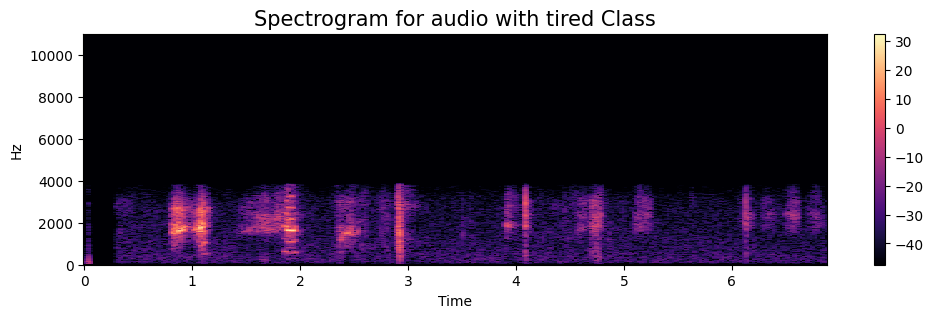

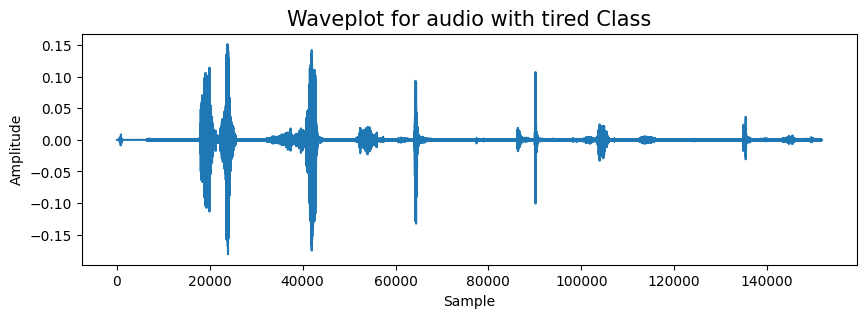

In [19]:
import librosa
from IPython.display import Audio
classes='tired'
path = np.array(df.Path[df.Class==classes])[0]
data, sampling_rate = librosa.load(path)
create_spectrogram(data, sampling_rate, classes)
create_waveplot(data, sampling_rate, classes)
Audio(path)

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

**Data Augmentation**

In [24]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sampling_rate, rate=0.7)

def time_masking(data, max_mask_time=100):
    mask_time = np.random.randint(0, max_mask_time)
    data[:mask_time] = 0
    return data

def frequency_masking(data, max_mask_freq=50):
    mask_freq = np.random.randint(0, max_mask_freq)
    data_freq = np.fft.fft(data)
    data_freq[:mask_freq] = 0
    return np.real(np.fft.ifft(data_freq))

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

def augment(data, sampling_rate):
    augmentations = [noise, stretch, shift, pitch, time_masking, frequency_masking]
    aug_choice = np.random.choice(augmentations)
    
    if aug_choice == pitch:
        return aug_choice(data, sampling_rate)
    else:
        return aug_choice(data)
augment(data, sample_rate)

array([1.44892611e-05, 1.44892501e-05, 1.44892390e-05, ...,
       1.44892943e-05, 1.44892833e-05, 4.50068503e-05])

In [25]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    #data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(new_data)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [26]:
X, Y = [], []
c=0
for path, Class in zip(df.Path, df.Class):
    feature = get_features(path)
    for ele in feature:
        c = c+1
        print(c)
        X.append(ele)
        # appending class 3 times as we have made 7 augmentation techniques on each audio file.
        Y.append(Class)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [27]:
len(X), len(Y), df.Path.shape

(750, 750, (250,))

In [28]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.053756,0.410105,0.398037,0.394833,0.448682,0.424246,0.470543,0.611725,0.534471,0.345000,...,3.607488e-08,3.347693e-08,3.125012e-08,2.933642e-08,2.774880e-08,2.649992e-08,2.554411e-08,2.488807e-08,2.448532e-08,discomfort
1,0.061691,0.416502,0.402583,0.406467,0.458364,0.432053,0.480795,0.615082,0.526377,0.340069,...,1.256829e-05,1.227267e-05,1.213116e-05,1.277582e-05,1.222387e-05,1.159239e-05,1.216934e-05,1.243377e-05,1.217550e-05,discomfort
2,0.058362,0.423240,0.392685,0.405366,0.473083,0.454403,0.496851,0.624043,0.522486,0.333914,...,2.983967e-08,2.769410e-08,2.586108e-08,2.423492e-08,2.291819e-08,2.188741e-08,2.108414e-08,2.056713e-08,2.021103e-08,discomfort
3,0.158384,0.448714,0.661585,0.602323,0.215153,0.318350,0.630878,0.550954,0.422497,0.270405,...,5.506877e-09,5.396180e-09,5.622284e-09,5.646177e-09,5.237698e-09,5.709797e-09,5.672928e-09,5.569938e-09,5.527033e-09,discomfort
4,0.163095,0.462604,0.669454,0.611610,0.246048,0.348243,0.647309,0.566981,0.440049,0.292787,...,4.040188e-08,4.139060e-08,4.488036e-08,4.137250e-08,4.056417e-08,4.037519e-08,4.075093e-08,4.099397e-08,4.344641e-08,discomfort


In [29]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [30]:
# Apply SMOTE to balance classes

smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X, Y)

In [31]:
# Create a new DataFrame with the balanced data
balanced_data = pd.DataFrame(X_smote)
balanced_data['labels'] = Y_smote

# Save the balanced data to a new CSV file
balanced_data.to_csv('balanced_features.csv', index=False)

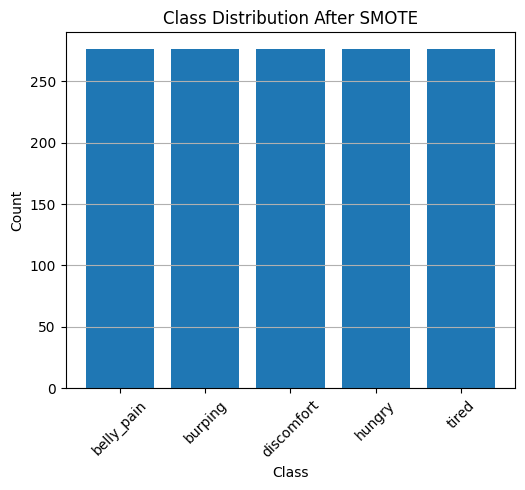

In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the features and labels from the balanced CSV file
balanced_data = pd.read_csv('balanced_features.csv')

# Separate features and labels
X_balanced = balanced_data.drop('labels', axis=1)
Y_balanced = balanced_data['labels']

# Count the occurrences of each class before and after SMOTE
balanced_class_counts = Y_balanced.value_counts().sort_index()

# Plotting the class distributions
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 2)
plt.bar(balanced_class_counts.index, balanced_class_counts.values)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [34]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y_balanced = encoder.fit_transform(np.array(Y_balanced).reshape(-1,1)).toarray()

In [35]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, random_state=0,test_size = 0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1104, 162), (1104, 5), (276, 162), (276, 5))

In [36]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1104, 162), (1104, 5), (276, 162), (276, 5))

In [37]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1104, 162, 1), (1104, 5), (276, 162, 1), (276, 5))

In [38]:
import tensorflow.keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint

In [39]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score



In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

model = Sequential()

# CNN layers
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))


model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=6))

# Flatten before passing to Dense layers
model.add(Flatten())

# DNN layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
# Final output layer
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729162479.720086   28445 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-17 18:54:39.722430: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 160, 16)        │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 80, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 78, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,600 (57.03 KB)

 Trainable params: 14,600 (57.03 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.5, verbose=0, patience=2, min_lr=0.0001)

Cross Validation

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Initialize lists to store aggregated predictions and actual labels
all_predicted_labels = []
all_actual_labels = []
# Create lists to store results from each fold
accuracies = []
losses = []
# Define the number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds)

# Iterate through each fold
for fold, (train_index, val_index) in enumerate(skf.split(X_balanced, Y_balanced.argmax(axis=1))):
    print(f"Fold {fold + 1}/{k_folds}")

    # Split data into train and validation sets for this fold
    x_train, x_val = X_balanced.iloc[train_index], X_balanced.iloc[val_index]
    y_train, y_val = Y_balanced[train_index], Y_balanced[val_index]

    # Perform any necessary data preprocessing (scaling, reshaping)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_val_scaled = scaler.transform(x_val)

    x_train_scaled = np.expand_dims(x_train_scaled, axis=2)
    x_val_scaled = np.expand_dims(x_val_scaled, axis=2)

 # Build your model
    model = Sequential()

    # CNN layers
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(x_train_scaled.shape[1], x_train_scaled.shape[2])))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=6))


    # Flatten before passing to Dense layers
    model.add(Flatten())

    # DNN layers
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))

    # Final output layer
    model.add(Dense(8, activation='softmax'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit(x_train_scaled, y_train, epochs=30, batch_size=64, validation_data=(x_val_scaled, y_val), callbacks=[ReduceLROnPlateau(monitor='loss', factor=0.5, verbose=0, patience=2, min_lr=0.0001)])

    # Evaluate the model on validation set
    _, accuracy = model.evaluate(x_val_scaled, y_val)
    accuracies.append(accuracy)
    losses.append(history.history['loss'][-1])

    # Make predictions on the validation set for this fold
    fold_predictions = model.predict(x_val_scaled)

    # Convert one-hot encoded labels back to categorical labels
    fold_predicted_labels = np.argmax(fold_predictions, axis=1)
    fold_actual_labels = np.argmax(y_val, axis=1)

    # Append fold predictions and actual labels to the aggregated lists
    all_predicted_labels.extend(fold_predicted_labels)
    all_actual_labels.extend(fold_actual_labels)

# Generate a classification report and confusion matrix from aggregated predictions
print("\nClassification Report:")
print(classification_report(all_actual_labels, all_predicted_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(all_actual_labels, all_predicted_labels))

# Print average accuracy and loss across all folds
print(f"Average accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average loss: {sum(losses) / len(losses)}")
model.summary()

Fold 1/5
Epoch 1/30


/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 5), output.shape=(None, 8)

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss trends across folds
plt.figure(figsize=(12, 5))

# Plotting accuracies
plt.subplot(1, 2, 1)
plt.plot(range(1, k_folds + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, k_folds + 1))
plt.grid()

# Plotting losses
plt.subplot(1, 2, 2)
plt.plot(range(1, k_folds + 1), losses, marker='o', linestyle='-', color='r')
plt.title('Loss across Folds')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.xticks(np.arange(1, k_folds + 1))
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# predicting on test data.
pred_test = model.predict(x_val_scaled)
y_pred = encoder.inverse_transform(pred_test)

y_test1 = encoder.inverse_transform(y_val)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = all_predicted_labels
df['Actual Labels'] = all_actual_labels

df

In [ ]:
import seaborn as sns
cm = confusion_matrix(all_actual_labels, all_predicted_labels)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(all_actual_labels, all_predicted_labels))

In [44]:
jupyter nbconvert --to script 'my-notebook.ipynb'

SyntaxError: invalid syntax (2626149870.py, line 1)

### Working

/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2419 - loss: 1.6067 - val_accuracy: 0.3560 - val_loss: 1.5506 - learning_rate: 0.0010
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3147 - loss: 1.5298 - val_accuracy: 0.4293 - val_loss: 1.4816 - learning_rate: 0.0010
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4090 - loss: 1.4507 - val_accuracy: 0.4239 - val_loss: 1.4070 - learning_rate: 0.0010
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4362 - loss: 1.3926 - val_accuracy: 0.4701 - val_loss: 1.3197 - learning_rate: 0.0010
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4776 - loss: 1.3246 - val_accuracy: 0.5217 - val_loss: 1.2254 - learning_rate: 0.0010
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5193 - loss: 1.2088 - val_accuracy: 0.5408 - val_loss: 1.1426 - learning_rate: 0.0010
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5733 - loss: 1.0933 - val_accuracy: 

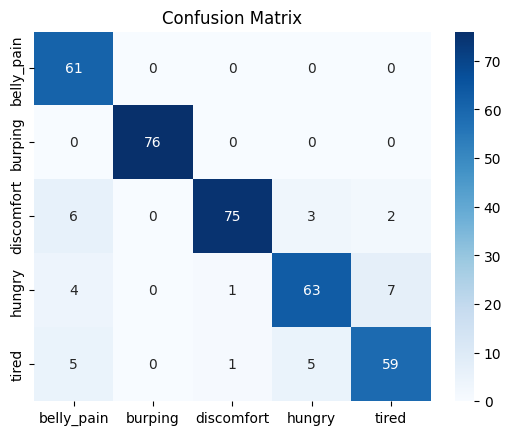

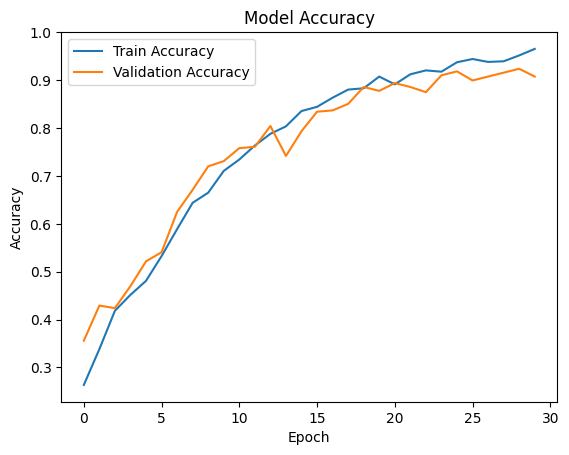

In [5]:
import os
import librosa
import numpy as np
import pandas as pd

# ------------------------------ Data Preprocessing ------------------------------
def load_audio_data(data_dir):
    """Load and return paths and classes for the dataset."""
    accent_folders = os.listdir(data_dir)
    data = []
    
    for accent_folder in accent_folders:
        accent_path = os.path.join(data_dir, accent_folder)
        for file in os.listdir(accent_path):
            if file.endswith('.wav'):
                file_path = os.path.join(accent_path, file)
                data.append((file_path, accent_folder))
    
    df = pd.DataFrame(data, columns=['Path', 'Class'])
    return df

# ------------------------------ Data Augmentation ------------------------------
def noise(data):
    if data.size == 0:  # Check if data is empty
        print("Empty audio data. Skipping noise augmentation.")
        return data
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    return data + noise_amp * np.random.normal(size=data.shape[0])

def stretch(data, rate=0.8):
    if data.size == 0:
        print("Empty audio data. Skipping stretch augmentation.")
        return data
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    if data.size == 0:
        print("Empty audio data. Skipping shift augmentation.")
        return data
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sr, rate=0.7):
    if data.size == 0:
        print("Empty audio data. Skipping pitch augmentation.")
        return data
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=rate)

def augment_audio(data, sr):
    """Apply multiple augmentation techniques."""
    augmentations = [noise, stretch, shift, pitch]
    augmented_data = []
    
    for aug in augmentations:
        if aug == pitch:
            augmented_data.append(aug(data, sr))
        else:
            augmented_data.append(aug(data))
    
    return augmented_data

# ------------------------------ Feature Extraction ------------------------------
def extract_audio_features(data, sr):
    """Extract various audio features."""
    if data.size == 0:
        print("Empty audio data. Skipping feature extraction.")
        return np.array([])
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    
    return np.hstack([zcr, chroma_stft, mfcc, rms, mel])

def get_augmented_features(path):
    """Load audio, augment and extract features."""
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    
    if data.size == 0:
        print(f"Empty audio file at {path}. Skipping.")
        return np.array([])

    augmented_data = augment_audio(data, sr)
    
    features = [extract_audio_features(aug, sr) for aug in augmented_data if aug.size > 0]
    
    if len(features) == 0:
        return np.array([])
    
    return np.vstack(features)

# ------------------------------ Class Balancing (SMOTE) ------------------------------
def balance_classes(X, Y):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_smote, Y_smote = smote.fit_resample(X, Y)
    return X_smote, Y_smote

# ------------------------------ Model Creation ------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=6))
    
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------ Data Preprocessing and Feature Extraction ------------------------------
data_dir = '/home/bokuto/Documents/baby-cry-analysis/data/clean_raw'
df = load_audio_data(data_dir)

# Example class mapping
df['Class'] = df['Class'].replace({
    '1': 'belly_pain', '2': 'burping', '3': 'discomfort', '4': 'hungry', '5': 'tired'
})

# Extract features and augment data
X, Y = [], []
for path, Class in zip(df.Path, df.Class):
    features = get_augmented_features(path)
    if features.size > 0:  # Only extend with valid features
        X.extend(features)
        Y.extend([Class] * features.shape[0])

# Convert to NumPy array
X = np.array(X)
Y = np.array(Y)

# Balance the dataset using SMOTE
X_balanced, Y_balanced = balance_classes(X, Y)

# One-Hot Encode the labels
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y_balanced = encoder.fit_transform(np.array(Y_balanced).reshape(-1, 1)).toarray()

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=0, shuffle=True)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape for CNN input
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# ------------------------------ Model Training ------------------------------
model = create_cnn_model(input_shape=(x_train.shape[1], 1))
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2, min_lr=0.0001)
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), callbacks=[rlrp])

# ------------------------------ Evaluation ------------------------------
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Get class names from the encoder
class_names = encoder.categories_[0]

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=class_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
import joblib

# After training the model
model.save('/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/baby_classifier_model_v2.h5')

# Save the scaler
joblib.dump(scaler, '/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/scaler.pkl')

# save the encoder
joblib.dump(encoder, '/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/encoder.pkl')

['/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/encoder.pkl']

### Cross Validation

Loading model, scaler, and encoder...
Fold 1/5
Epoch 1/30


/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3767 - loss: 1.5472 - val_accuracy: 0.5522 - val_loss: 1.3506 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5374 - loss: 1.4069 - val_accuracy: 0.5522 - val_loss: 1.2494 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5696 - loss: 1.3431 - val_accuracy: 0.5522 - val_loss: 1.2326 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5339 - loss: 1.3281 - val_accuracy: 0.5522 - val_loss: 1.2401 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5594 - loss: 1.2735 - val_accuracy: 0.5522 - val_loss: 1.2224 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5433 - loss: 1.2592 - val_accuracy: 0.5522 - val_loss: 1.2084 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5399 - loss: 1.2694 - val_accuracy: 0.5522 - val_loss: 1.191

/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4250 - loss: 1.5452 - val_accuracy: 0.5522 - val_loss: 1.4833 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5447 - loss: 1.4094 - val_accuracy: 0.5522 - val_loss: 1.4140 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5541 - loss: 1.3290 - val_accuracy: 0.5522 - val_loss: 1.3444 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5605 - loss: 1.2952 - val_accuracy: 0.5522 - val_loss: 1.3035 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5566 - loss: 1.2814 - val_accuracy: 0.5522 - val_loss: 1.2846 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 1.3441 - val_accuracy: 0.5522 - val_loss: 1.2910 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5344 - loss: 1.2874 - val_accuracy: 0.5522 - val_loss: 1.262

/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4445 - loss: 1.5156 - val_accuracy: 0.5448 - val_loss: 1.4448 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5598 - loss: 1.3606 - val_accuracy: 0.5448 - val_loss: 1.4338 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5553 - loss: 1.3240 - val_accuracy: 0.5448 - val_loss: 1.3553 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5761 - loss: 1.2586 - val_accuracy: 0.5448 - val_loss: 1.3290 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5510 - loss: 1.2592 - val_accuracy: 0.5448 - val_loss: 1.2957 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5491 - loss: 1.2226 - val_accuracy: 0.5448 - val_loss: 1.2635 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5576 - loss: 1.1787 - val_accuracy: 0.5448 - val_loss: 1.236

/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2097 - loss: 1.7556 - val_accuracy: 0.5489 - val_loss: 1.4746 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4984 - loss: 1.4879 - val_accuracy: 0.5489 - val_loss: 1.3514 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5369 - loss: 1.3816 - val_accuracy: 0.5489 - val_loss: 1.2926 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5512 - loss: 1.3148 - val_accuracy: 0.5489 - val_loss: 1.2728 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5517 - loss: 1.2962 - val_accuracy: 0.5489 - val_loss: 1.2662 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5438 - loss: 1.2825 - val_accuracy: 0.5489 - val_loss: 1.2576 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5582 - loss: 1.2642 - val_accuracy: 0.5489 - val_loss: 1.243

/home/bokuto/Documents/baby-cry-analysis/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3502 - loss: 1.5348 - val_accuracy: 0.5564 - val_loss: 1.3624 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5470 - loss: 1.4610 - val_accuracy: 0.5564 - val_loss: 1.3028 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5509 - loss: 1.3914 - val_accuracy: 0.5564 - val_loss: 1.2653 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5461 - loss: 1.2886 - val_accuracy: 0.5564 - val_loss: 1.2293 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5635 - loss: 1.2885 - val_accuracy: 0.5564 - val_loss: 1.2164 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5501 - loss: 1.2321 - val_accuracy: 0.5564 - val_loss: 1.1995 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5528 - loss: 1.2413 - val_accuracy: 0.5564 - val_loss: 1.175

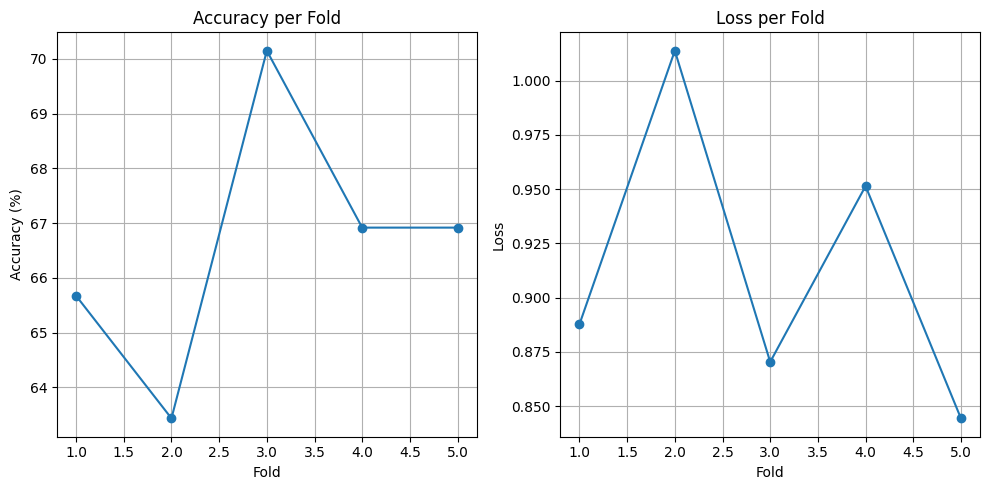

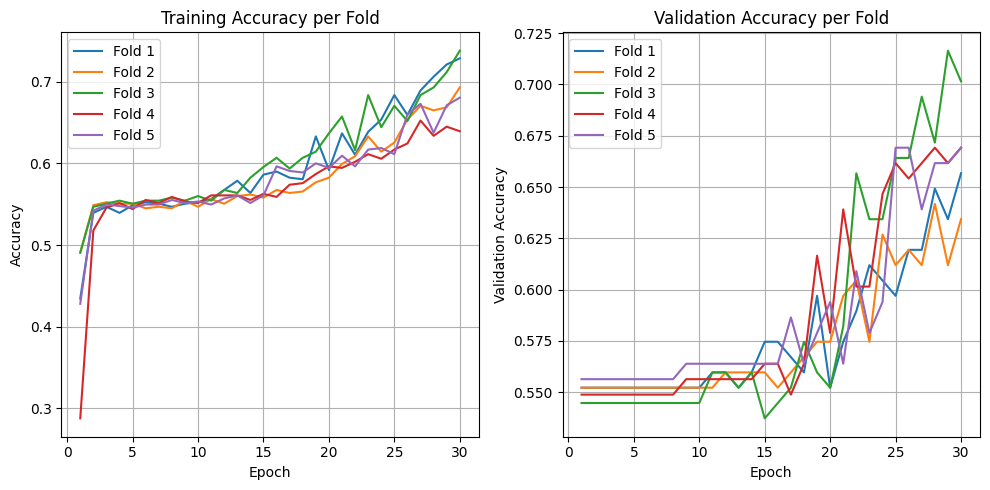

Cross-validation results:
> Accuracy: 66.62% ± 2.18%
> Loss: 0.9135 ± 0.0613


In [11]:
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

# ---------------------------- Load Saved Model, Scaler, and Encoder ----------------------------
print("Loading model, scaler, and encoder...")
model_path = '/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/baby_classifier_model_v2.h5'
scaler_path = '/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/scaler.pkl'
encoder_path = '/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/encoder.pkl'

# Load model, scaler, and encoder
model_template = load_model(model_path)
scaler = joblib.load(scaler_path)
encoder = joblib.load(encoder_path)
class_names = encoder.categories_[0]  # Get class names from the encoder

# ---------------------------- Feature Extraction ----------------------------
def extract_audio_features(data, sr):
    """Extract various audio features."""
    if data.size == 0:
        return np.array([])
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    
    return np.hstack([zcr, chroma_stft, mfcc, rms, mel])

# ---------------------------- Cross-Validation ----------------------------
def create_cnn_model(input_shape):
    """Create CNN model (same architecture as your saved model)."""
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=6))
    
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ---------------------------- Cross-Validation Training ----------------------------
def cross_validate(X, Y, n_splits=5):
    """Perform cross-validation using StratifiedKFold and plot results."""
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_no = 1
    accuracy_per_fold = []
    loss_per_fold = []
    histories = []

    for train_index, val_index in skf.split(X, np.argmax(Y, axis=1)):
        print(f'Fold {fold_no}/{n_splits}')
        
        # Split the data
        x_train, x_val = X[train_index], X[val_index]
        y_train, y_val = Y[train_index], Y[val_index]

        # Standardize features (use saved scaler)
        x_train = scaler.transform(x_train)
        x_val = scaler.transform(x_val)

        # Reshape for CNN input
        x_train = np.expand_dims(x_train, axis=2)
        x_val = np.expand_dims(x_val, axis=2)

        # Create and compile the model for this fold
        model = create_cnn_model(input_shape=(x_train.shape[1], 1))

        # Train the model
        rlrp = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2, min_lr=0.0001)
        history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val), callbacks=[rlrp], verbose=1)

        # Evaluate the model on validation data
        scores = model.evaluate(x_val, y_val, verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} = {scores[0]}; {model.metrics_names[1]} = {scores[1]}')

        accuracy_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        histories.append(history.history)  # Save history for plotting

        # Increment fold number
        fold_no += 1

    # Plot cross-validation accuracy and loss
    plot_cross_validation_results(accuracy_per_fold, loss_per_fold)
    
    # Plot accuracy and loss over epochs for each fold
    plot_training_history(histories)

    # Print overall results
    print('Cross-validation results:')
    print(f'> Accuracy: {np.mean(accuracy_per_fold):.2f}% ± {np.std(accuracy_per_fold):.2f}%')
    print(f'> Loss: {np.mean(loss_per_fold):.4f} ± {np.std(loss_per_fold):.4f}')

# ---------------------------- Plotting Functions ----------------------------
def plot_cross_validation_results(accuracy_per_fold, loss_per_fold):
    """Plot accuracy and loss per fold."""
    folds = range(1, len(accuracy_per_fold) + 1)

    plt.figure(figsize=(10, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(folds, accuracy_per_fold, marker='o', label='Accuracy per Fold')
    plt.title('Accuracy per Fold')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(folds, loss_per_fold, marker='o', label='Loss per Fold')
    plt.title('Loss per Fold')
    plt.xlabel('Fold')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_training_history(histories):
    """Plot accuracy and validation accuracy over epochs for each fold."""
    epochs = range(1, len(histories[0]['accuracy']) + 1)

    plt.figure(figsize=(10, 5))

    # Plot training accuracy
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(epochs, history['accuracy'], label=f'Fold {i+1}')
    plt.title('Training Accuracy per Fold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(epochs, history['val_accuracy'], label=f'Fold {i+1}')
    plt.title('Validation Accuracy per Fold')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# ---------------------------- Main Program ----------------------------
data_dir = '/home/bokuto/Documents/baby-cry-analysis/data/clean_raw'
df = load_audio_data(data_dir)  # Load the data

# Example class mapping
df['Class'] = df['Class'].replace({
    '1': 'belly_pain', '2': 'burping', '3': 'discomfort', '4': 'hungry', '5': 'tired'
})

# Extract features and augment data
X, Y = [], []
for path, Class in zip(df.Path, df.Class):
    features = get_augmented_features(path)
    if features.size > 0:
        X.extend(features)
        Y.extend([Class] * features.shape[0])

# Convert to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# One-Hot Encode the labels
Y_encoded = encoder.transform(Y.reshape(-1, 1)).toarray()

# Perform cross-validation
cross_validate(X, Y_encoded)


### Testing

In [9]:
# Load the model, scaler, and encoder
from tensorflow.keras.models import load_model
import joblib

# Load the model
model = load_model('/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/baby_cry_classifier.h5')

# Load the scaler
scaler = joblib.load('/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/scaler.pkl')

# Load the encoder
encoder = joblib.load('/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/encoder.pkl')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/bokuto/Documents/baby-cry-analysis/notebooks/models/cnn_model/v3/baby_cry_classifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
# Testing data
# ------------------------------ Processing Unseen Audio Files ------------------------------
def process_unseen_audio(path):
    """Load and process a single unseen audio file."""
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    
    # Extract features
    features = extract_audio_features(data, sr)
    
    # Scale the features using the saved scaler
    features = scaler.transform([features])  # Scaling
    
    # Reshape for CNN input
    features = np.expand_dims(features, axis=2)
    
def predict_directory(directory_path):
    """Process and predict all audio files in a directory."""
    predictions = []
    actual_files = []
    
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.wav'):  # Ensure we're only testing WAV files
            file_path = os.path.join(directory_path, file_name)
            
            # Process and predict the unseen audio file
            features = process_unseen_audio(file_path)
            predicted_class = model.predict(features)
            predicted_label = encoder.inverse_transform(predicted_class)
            
            predictions.append(predicted_label[0])  # Collect prediction
            actual_files.append(file_name)  # Keep track of file names
    
    return predictions, actual_files

In [7]:
# Path to the directory containing unseen audio files
unseen_directory = '/home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw/belly_pain/'

# Make predictions on all files in the directory
predictions, files = predict_directory(unseen_directory)

# ------------------------------ Display Predictions ------------------------------
# Display file names and their predicted labels
for file, prediction in zip(files, predictions):
    print(f'{file}: Predicted class = {prediction}')


AttributeError: 'NoneType' object has no attribute 'shape'

### Testing 

In [5]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('baby_cry_classifier.h5')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [6]:
# Make predictions using the trained model
y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [7]:
y_pred

array([[5.02201633e-13, 3.18704392e-19, 9.78806440e-08, 9.99999881e-01,
        6.76816658e-10],
       [2.60816887e-02, 4.46869562e-05, 8.51880074e-01, 1.25999339e-02,
        1.09393626e-01],
       [2.61133490e-03, 2.67300475e-03, 2.82080136e-02, 7.17076302e-01,
        2.49431312e-01],
       ...,
       [1.13115775e-07, 9.99365032e-01, 5.10169457e-06, 7.44669819e-07,
        6.29033893e-04],
       [1.99882337e-03, 2.07413882e-02, 7.28968084e-01, 1.80549473e-01,
        6.77422434e-02],
       [2.08751917e-05, 9.53269660e-01, 3.47080454e-03, 3.58020305e-04,
        4.28806506e-02]], dtype=float32)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
    True Label Predicted Label  Correct
0       hungry          hungry     True
1   discomfort      discomfort     True
2        tired           tired     True
3   belly_pain      belly_pain     True
4   belly_pain      belly_pain     True
5       hungry          hungry     True
6      burping         burping     True
7        tired           tired     True
8       hungry          hungry     True
9   discomfort      discomfort     True
10      hungry           tired    False
11  discomfort      discomfort     True
12      hungry          hungry     True
13  belly_pain      belly_pain     True
14  discomfort      discomfort     True
15  belly_pain      belly_pain     True
16  belly_pain      belly_pain     True
17       tired           tired     True
18       tired           tired     True
19     burping         burping     True

Classification Report:
              precision    recall  f1-score   support

  belly_pain       0.88      0.94      0.

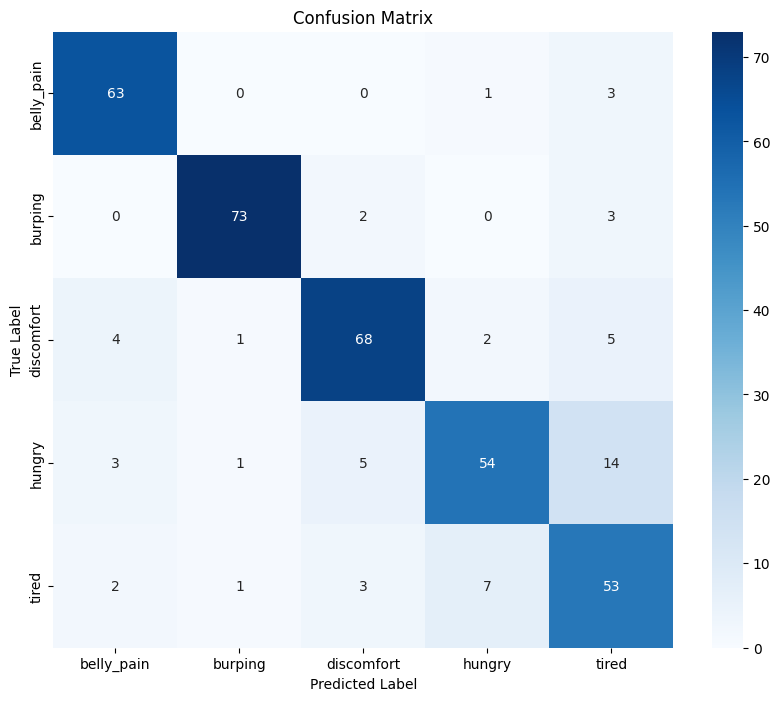

Accuracy for belly_pain: 0.94
Accuracy for burping: 0.94
Accuracy for discomfort: 0.85
Accuracy for hungry: 0.70
Accuracy for tired: 0.80

Some misclassified examples:
    True Label Predicted Label  Correct
10      hungry           tired    False
27      hungry           tired    False
42  discomfort      belly_pain    False
47  discomfort          hungry    False
48      hungry         burping    False
51      hungry           tired    False
62      hungry           tired    False
68       tired          hungry    False
78       tired      belly_pain    False
79      hungry      discomfort    False


In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have x_test and y_test

# Get predictions
y_pred = model.predict(x_test)

# Convert one-hot encoded labels back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Get the original class names
class_names = encoder.categories_[0]

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'True Label': [class_names[i] for i in y_test_labels],
    'Predicted Label': [class_names[i] for i in y_pred_labels],
    'Correct': y_test_labels == y_pred_labels
})

# Display the first few results
print(results_df.head(20))

# Print overall metrics
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=class_names))

# Create and display confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate and display accuracy for each class
class_accuracy = cm.diagonal() / cm.sum(axis=1)
for class_name, accuracy in zip(class_names, class_accuracy):
    print(f"Accuracy for {class_name}: {accuracy:.2f}")

# Display some misclassified examples
misclassified = results_df[results_df['Correct'] == False]
print("\nSome misclassified examples:")
print(misclassified.head(10))

Starting the script...
Loading the model...
Model loaded successfully.
Creating scaler from directory: /home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw
Recreating scaler from directory: /home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extracting audio features...
Extrac

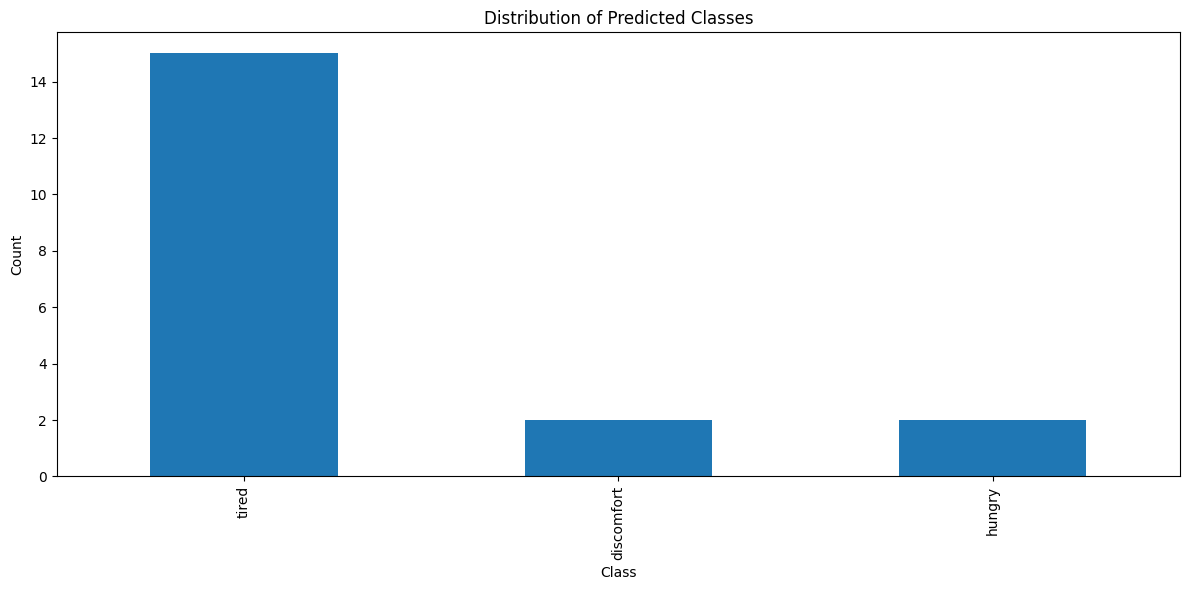

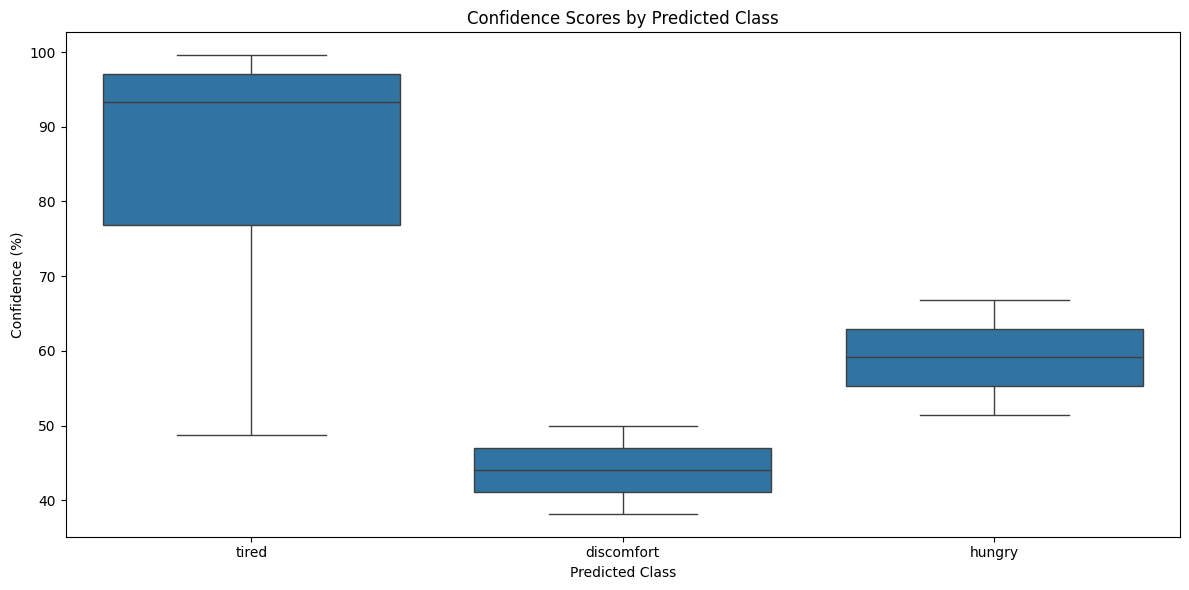

In [8]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

print("Starting the script...")

def extract_audio_features(data, sr):
    print("Extracting audio features...")
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    
    return np.hstack([zcr, chroma_stft, mfcc, rms, mel])

print("Loading the model...")
try:
    model = load_model('baby_cry_classifier.h5')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")
    exit(1)

def recreate_scaler(data_dir):
    print(f"Recreating scaler from directory: {data_dir}")
    all_features = []
    file_count = 0
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                try:
                    data, sr = librosa.load(file_path, duration=2.5, offset=0.6)
                    features = extract_audio_features(data, sr)
                    all_features.append(features)
                    file_count += 1
                    if file_count % 100 == 0:
                        print(f"Processed {file_count} files...")
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")
    
    print(f"Total files processed: {file_count}")
    all_features = np.array(all_features)
    scaler = StandardScaler()
    scaler.fit(all_features)
    print("Scaler created successfully.")
    return scaler

data_dir = '/home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw'
print(f"Creating scaler from directory: {data_dir}")
try:
    scaler = recreate_scaler(data_dir)
except Exception as e:
    print(f"Error creating scaler: {e}")
    exit(1)

class_names = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

def predict_audio(file_path):
    print(f"Predicting for file: {file_path}")
    try:
        data, sr = librosa.load(file_path, duration=2.5, offset=0.6)
        features = extract_audio_features(data, sr)
        scaled_features = scaler.transform(features.reshape(1, -1))
        scaled_features = np.expand_dims(scaled_features, axis=2)
        prediction = model.predict(scaled_features)
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100
        return predicted_class, confidence
    except Exception as e:
        print(f"Error predicting for file {file_path}: {e}")
        return None, None
results = []

test_directory = '/home/bokuto/Documents/baby-cry-analysis/data/sample_test/tired'
print(f"Testing files in directory: {test_directory}")

if not os.path.exists(test_directory):
    print(f"Test directory does not exist: {test_directory}")
    exit(1)

files_processed = 0
for filename in os.listdir(test_directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(test_directory, filename)
        predicted_class, confidence = predict_audio(file_path)
        if predicted_class and confidence:
            print(f"File: {filename}")
            print(f"Predicted class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}%")
            print("--------------------")
            results.append({
                'filename': filename,
                'predicted_class': predicted_class,
                'confidence': confidence
            })
        files_processed += 1

if files_processed == 0:
    print("No .wav files found in the test directory.")
else:
    print(f"Processed {files_processed} files.")

# Save results to CSV
results_df = pd.DataFrame(results)
csv_path = 'prediction_results.csv'
results_df.to_csv(csv_path, index=False)
print(f"Results saved to {csv_path}")

# Create a bar plot of predictions
plt.figure(figsize=(12, 6))
class_counts = results_df['predicted_class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plot_path = 'prediction_distribution.png'
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")


# Create a box plot of confidence scores for each class
plt.figure(figsize=(12, 6))
sns.boxplot(x='predicted_class', y='confidence', data=results_df)
plt.title('Confidence Scores by Predicted Class')
plt.xlabel('Predicted Class')
plt.ylabel('Confidence (%)')
plt.tight_layout()
boxplot_path = 'confidence_boxplot.png'
plt.savefig(boxplot_path)
print(f"Confidence box plot saved to {boxplot_path}")

# Calculate summary statistics
summary_stats = results_df.groupby('predicted_class')['confidence'].describe()
summary_stats = summary_stats.sort_values('mean', ascending=False)

# Save summary statistics to CSV
summary_stats.to_csv('confidence_summary_stats.csv')

print("Script completed.")

### New Testing

In [12]:
import os
import librosa
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# ---------------------------- Load the Model, Scaler, and Encoder ----------------------------
print("Loading model, scaler, and encoder...")
model = load_model('baby_cry_classifier.h5')
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('encoder.pkl')

# Ensure the target classes are the 5 you expect
class_names = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

# ---------------------------- Feature Extraction ----------------------------
def extract_audio_features(data, sr):
    """Extract various audio features."""
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    
    return np.hstack([zcr, chroma_stft, mfcc, rms, mel])

# ---------------------------- Predict Audio from Directory ----------------------------
def predict_directory(directory_path):
    """Process and predict all audio files in a directory."""
    predictions = []
    true_labels = []
    actual_files = []
    skipped_files = []  # Track skipped files

    for file_name in os.listdir(directory_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(directory_path, file_name)

            # Process and predict the unseen audio file
            data, sr = librosa.load(file_path, duration=2.5, offset=0.6)
            features = extract_audio_features(data, sr)
            scaled_features = scaler.transform(features.reshape(1, -1))
            scaled_features = np.expand_dims(scaled_features, axis=2)

            # Make prediction
            predicted_class = model.predict(scaled_features)
            predicted_label = encoder.inverse_transform(predicted_class)[0]

            # Collect predicted label
            predictions.append(predicted_label)
            actual_files.append(file_name)

            # Extract true label from filename (assuming it's part of the filename, adjust if needed)
            true_class = file_name.split('_')[0]  # Assuming the true label is part of the file name
            if true_class in class_names:  # Only include expected classes
                true_labels.append(true_class)
            else:
                skipped_files.append(file_name)  # Track the file if true class doesn't match expected classes

    # Log skipped files
    if skipped_files:
        print(f"Skipped {len(skipped_files)} files due to unknown true labels: {skipped_files}")

    return predictions, true_labels, actual_files

# ---------------------------- Main Function ----------------------------
test_directory = '/home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw/belly_pain'
print(f"Testing files in directory: {test_directory}")

if not os.path.exists(test_directory):
    print(f"Test directory does not exist: {test_directory}")
    exit(1)

# Predict the classes for the files in the test directory
predictions, true_labels, files = predict_directory(test_directory)

# ---------------------------- Classification Report ----------------------------
if len(predictions) == len(true_labels):
    print("Generating Classification Report...")
    
    # Generate classification report using true labels and predictions, restricting to expected classes
    print(classification_report(true_labels, predictions, labels=class_names, target_names=class_names))
    
    # Plot confusion matrix
    print("Generating Confusion Matrix...")
    cm = confusion_matrix(true_labels, predictions, labels=class_names)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

else:
    print(f"Mismatch in the number of predictions ({len(predictions)}) and true labels ({len(true_labels)}).")


Loading model, scaler, and encoder...
Testing files in directory: /home/bokuto/Documents/baby-cry-analysis/data/audio_augmented_raw/belly_pain
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━

# Testing

Starting the script...
Loading the model...
Model loaded successfully.
Loading the scaler...
Error loading the scaler: invalid load key, '\x0e'.
Loading the encoder...
Error loading the encoder: invalid load key, '\x10'.
Testing files in directory: /home/bokuto/Documents/baby-cry-analysis/data/sample_test/tired
Predicting for file: /home/bokuto/Documents/baby-cry-analysis/data/sample_test/tired/d5abedab-9ed5-48d0-a83b-fc00c33d6d6b-1430079192907-1.7-f-04-ti.wav
Extracting audio features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
File: d5abedab-9ed5-48d0-a83b-fc00c33d6d6b-1430079192907-1.7-f-04-ti.wav
Predicted class: tired
Confidence: 75.72%
--------------------
Predicting for file: /home/bokuto/Documents/baby-cry-analysis/data/sample_test/tired/06c4cfa2-7fa6-4fda-91a1-ea186a4acc64-1430029237378-1.7-f-26-ti.wav
Extracting audio features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
File: 06c4cfa2-7fa6-4fda-91a1-ea186a4acc64-1430029237378-1.7-f-26-ti.wav
Predicted class: tired
Confidence: 62.73

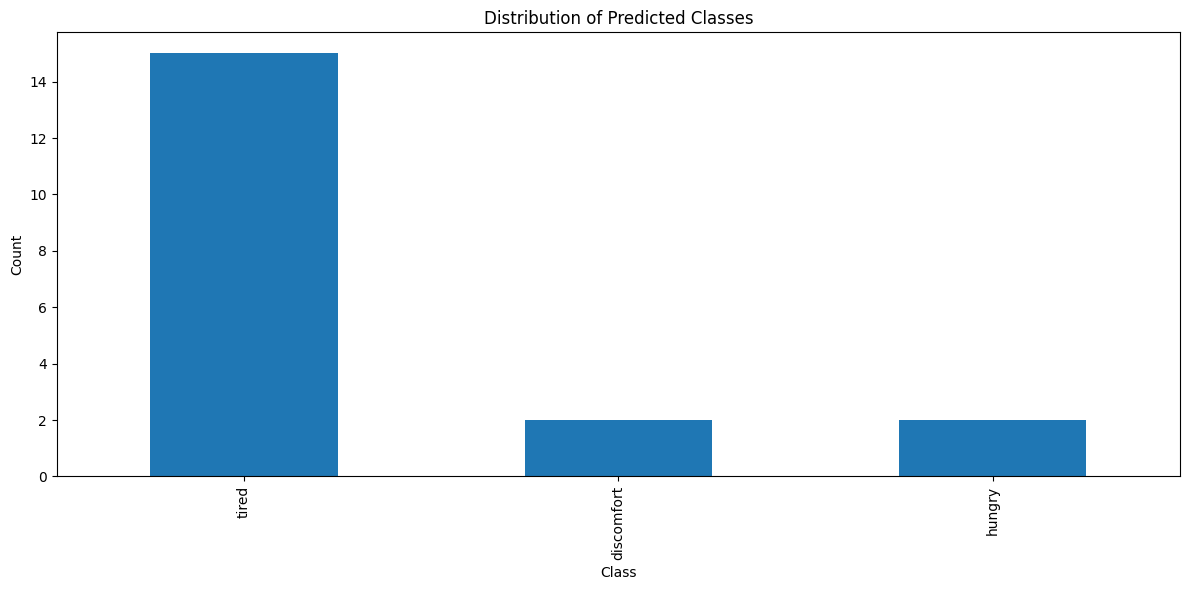

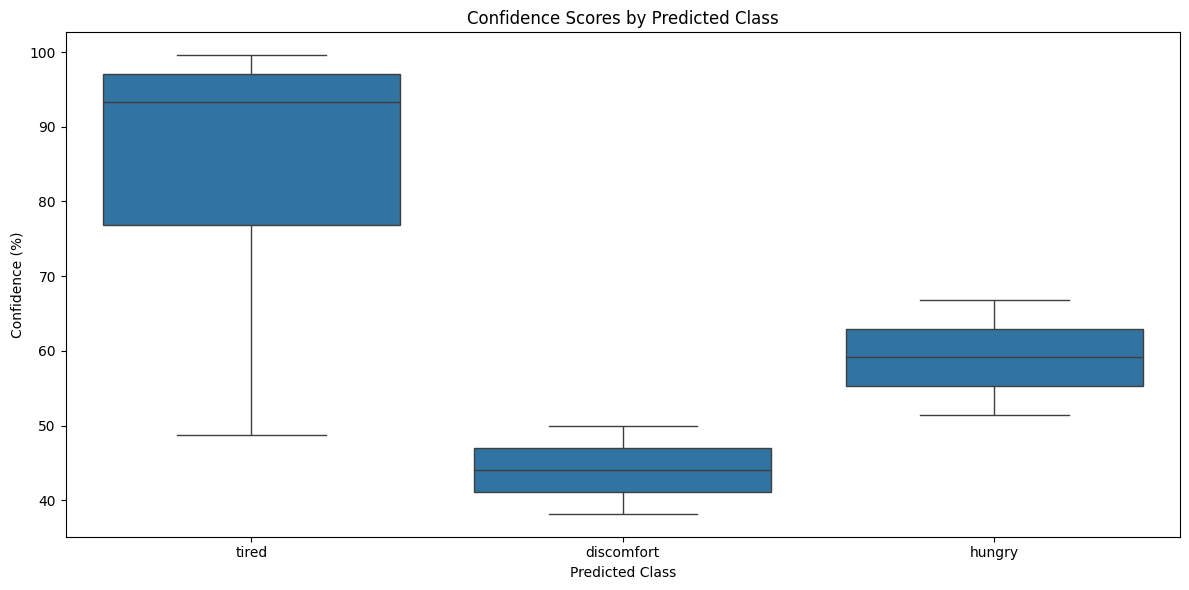

In [15]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pickle

print("Starting the script...")

def extract_audio_features(data, sr):
    print("Extracting audio features...")
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(data)), sr=sr).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    
    return np.hstack([zcr, chroma_stft, mfcc, rms, mel])

print("Loading the model...")
try:
    model = load_model('baby_cry_classifier.h5')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")
    exit(1)

print("Loading the scaler...")
try:
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    print("Scaler loaded successfully.")
except Exception as e:
    print(f"Error loading the scaler: {e}")
    exit(1)

print("Loading the encoder...")
try:
    with open('encoder.pkl', 'rb') as f:
        encoder = pickle.load(f)
    print("Encoder loaded successfully.")
except Exception as e:
    print(f"Error loading the encoder: {e}")
    exit(1)

class_names = list(encoder.categories_[0])

def predict_audio(file_path):
    print(f"Predicting for file: {file_path}")
    try:
        data, sr = librosa.load(file_path, duration=2.5, offset=0.6)
        features = extract_audio_features(data, sr)
        scaled_features = scaler.transform(features.reshape(1, -1))
        scaled_features = np.expand_dims(scaled_features, axis=2)
        prediction = model.predict(scaled_features)
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100
        return predicted_class, confidence
    except Exception as e:
        print(f"Error predicting for file {file_path}: {e}")
        return None, None

results = []

test_directory = '/home/bokuto/Documents/baby-cry-analysis/data/sample_test/tired'
print(f"Testing files in directory: {test_directory}")

if not os.path.exists(test_directory):
    print(f"Test directory does not exist: {test_directory}")
    exit(1)

files_processed = 0
for filename in os.listdir(test_directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(test_directory, filename)
        predicted_class, confidence = predict_audio(file_path)
        if predicted_class and confidence:
            print(f"File: {filename}")
            print(f"Predicted class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}%")
            print("--------------------")
            results.append({
                'filename': filename,
                'predicted_class': predicted_class,
                'confidence': confidence
            })
        files_processed += 1

if files_processed == 0:
    print("No .wav files found in the test directory.")
else:
    print(f"Processed {files_processed} files.")

# Save results to CSV
results_df = pd.DataFrame(results)
csv_path = 'prediction_results.csv'
results_df.to_csv(csv_path, index=False)
print(f"Results saved to {csv_path}")

# Create a bar plot of predictions
plt.figure(figsize=(12, 6))
class_counts = results_df['predicted_class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plot_path = 'prediction_distribution.png'
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

# Create a box plot of confidence scores for each class
plt.figure(figsize=(12, 6))
sns.boxplot(x='predicted_class', y='confidence', data=results_df)
plt.title('Confidence Scores by Predicted Class')
plt.xlabel('Predicted Class')
plt.ylabel('Confidence (%)')
plt.tight_layout()
boxplot_path = 'confidence_boxplot.png'
plt.savefig(boxplot_path)
print(f"Confidence box plot saved to {boxplot_path}")

# Calculate summary statistics
summary_stats = results_df.groupby('predicted_class')['confidence'].describe()
summary_stats = summary_stats.sort_values('mean', ascending=False)

# Save summary statistics to CSV
summary_stats.to_csv('confidence_summary_stats.csv')
print("Summary statistics saved to confidence_summary_stats.csv")

print("Script completed.")